# Purpose

Data Visualisation is a method that uses graphics to represent data. In below sessions, data will be transformed into different visual forms.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

# Line Chart

Dataset Description: A COVID-19 dataset collected from World Health Organisation

Data Dictionary:
- Date_reported: The date when the data was reported in year-month-day format.
- Country: The country to which the report corresponds.
- New_cases: The number of new cases reported for that date and for that country.
- Cumulative_cases: The number of total cases up to that date in that country.
- New_deaths: The number of new deaths reported for that date and for that country.
- Cumulative_deaths: The number of total deaths up to that day in that country.

In [29]:
#Read CSV
who_time_series = pd.read_csv('WHO_time_series.csv')
who_time_series['Date_reported'] = pd.to_datetime(who_time_series['Date_reported'])
display(who_time_series.head(10))
who_time_series.info()

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,China,1,1,0,0
1,2020-01-05,China,0,1,0,0
2,2020-01-06,China,3,4,0,0
3,2020-01-07,China,0,4,0,0
4,2020-01-08,China,0,4,0,0
5,2020-01-09,China,0,4,0,0
6,2020-01-10,China,0,4,0,0
7,2020-01-11,China,41,45,1,1
8,2020-01-12,China,0,45,0,1
9,2020-01-13,Thailand,5,5,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31876 entries, 0 to 31875
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      31876 non-null  datetime64[ns]
 1   Country            31876 non-null  object        
 2   New_cases          31876 non-null  int64         
 3   Cumulative_cases   31876 non-null  int64         
 4   New_deaths         31876 non-null  int64         
 5   Cumulative_deaths  31876 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.5+ MB


## Part 1: Time Series Growth Pattern

In this part, let's find the growth pattern among three countries - Brazil, Iceland & Argentina.

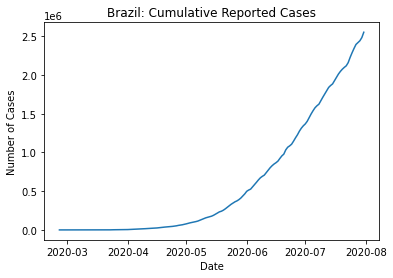

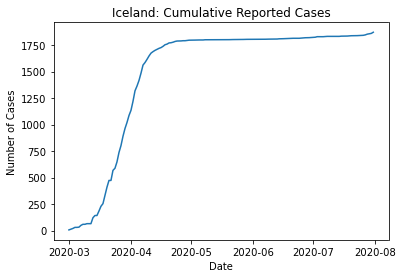

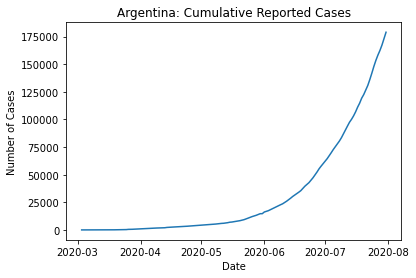

In [30]:
def plot_cumulative_cases(country_name):
    country = who_time_series[who_time_series['Country'] == country_name]
    plt.plot(country['Date_reported'], country['Cumulative_cases'])
    plt.title('{}: Cumulative Reported Cases'.format(country_name))
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.show()
    
plot_cumulative_cases('Brazil')
plot_cumulative_cases('Iceland')
plot_cumulative_cases('Argentina')

Finding:
It is interesting to see that aboves charts are showing different growth patterns of COVID-19 cases among Brazil, Iceland & Argentina. Refering below photo, Brazil and Argentina charts show Exponential growth, meanwhile Iceland chart shows Logarithmic growth.

In [31]:
Image(url="Type_of_growth.png", width=300, height=300)

## Part 2: Time Series Comparison

In this part, let's compare the cases among France, UK & Italy.

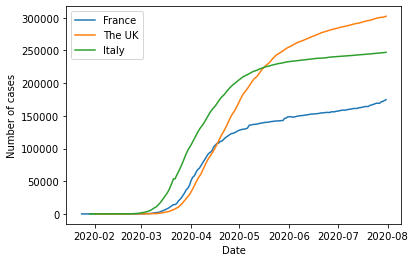

In [32]:
france = who_time_series[who_time_series['Country'] == 'France']
uk = who_time_series[who_time_series['Country'] == 'The United Kingdom']
italy = who_time_series[who_time_series['Country'] == 'Italy']

plt.plot(france['Date_reported'], france['Cumulative_cases'], label='France')
plt.plot(uk['Date_reported'], uk['Cumulative_cases'], label='The UK')
plt.plot(italy['Date_reported'], italy['Cumulative_cases'], label='Italy')
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.legend()
plt.show()

Finding: Above chart shows that France, UK & Italy show similar pattern, however cases in UK in Aug 2020 reached around 300k, nearly double of France which accounted 150k.

# Scatter Plot

Dataset Description: A dataset describes the daily activity of a bike-sharing company from https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

Data Dictionary:
- dteday: date in year-month-day format.
- temp: normalized temperature in Celsius (1 is the maximum value, and it's equivalent to 41 Celsius degrees).
- atemp: normalized feeling temperature in Celsius (1 is the maximum value, and it's equivalent to 50 Celsius degrees).
- hum: normalized humidity.
- windspeed: normalized wind speed.
- casual: the number of casual (non-registered) people who rented a bike that day.
registered: the number of registered people who rented a bike that day (registered people bought a membership).
- cnt: the total number of people who rented a bike (casual plus registered).

In [33]:
bike_sharing = pd.read_csv('Bike_sharing.csv')
display(bike_sharing.head(5))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Let's explore the total number of bike rentals changed over time.

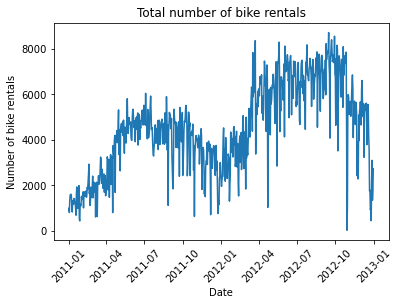

In [34]:
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])
plt.plot(bike_sharing['dteday'], bike_sharing['cnt'])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Number of bike rentals')
plt.title('Total number of bike rentals')
plt.show()

Above chart shows that the number of bike rentals rised in Jan-May, remained steady in May-Sept and saw a fall in Oct-Dec in both 2011 & 2012. It seems that there is a seasonality trend in bike rentals. Let's explore the change of temperature over time.

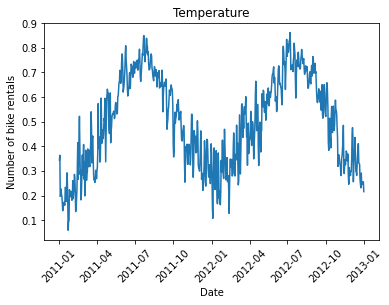

In [35]:
plt.plot(bike_sharing['dteday'],bike_sharing['temp'])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Number of bike rentals')
plt.title('Temperature')
plt.show()

Comparing the total number of bike rentals and temperature charts, it seems that the sales were high as the temperature rised and low as the temperature decreased. Let's visualize the relationship between cnt and temp.

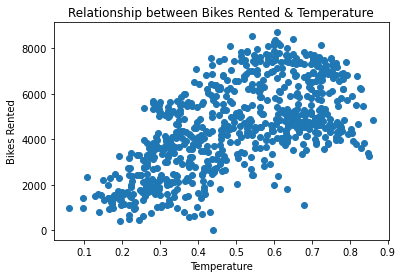

In [36]:
plt.scatter(bike_sharing['temp'], bike_sharing['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Bikes Rented')
plt.title('Relationship between Bikes Rented & Temperature')
plt.show()

Above scatter plot shows a upward relationship between number of bike rented and temperature. Let's explore one more factor in the data, whether the windspeed would affect the number of bike rented or not.

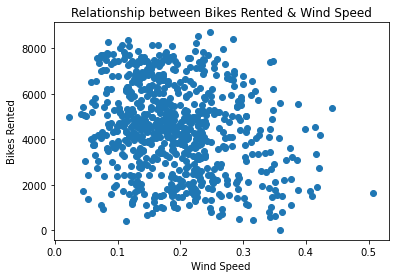

In [37]:
plt.scatter(bike_sharing['windspeed'],bike_sharing['cnt'])
plt.xlabel('Wind Speed')
plt.ylabel('Bikes Rented')
plt.title('Relationship between Bikes Rented & Wind Speed')
plt.show()

In contrast, above scatter plots shows a downward trend between Wind Speed and the number of bikes rented. Let's further explore the correlation between above factors.

In [38]:
temp_cnt = bike_sharing['temp'].corr(bike_sharing['cnt'])
windspeed_cnt = bike_sharing['windspeed'].corr(bike_sharing['cnt'])
print(f'Correlation between temp & cnt: {temp_cnt}')
print(f'Correlation between windspeed & cnt: {windspeed_cnt}')

Correlation between temp & cnt: 0.6274940090334918
Correlation between windspeed & cnt: -0.23454499742167


Above scores show that there is a +ve correlation between temperature & total number of bikes rented, whereas windspeed & total number of bikes rented shows -ve correlation.

# Bar Plots, Histograms, and Distributions

Below session continues to analyze bike sharing dataset using bar charts, histograms & distributions. Let's explore the renting between different users (casual & registered) on workingday or not.

In [39]:
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


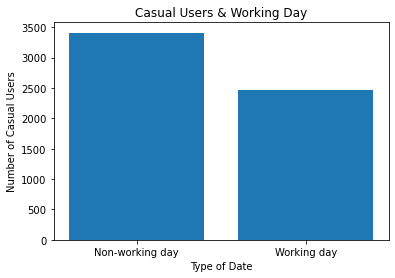

In [40]:
bike_sharing['workingday_str'] = bike_sharing['workingday'].astype(str)
bike_sharing['workingday_str'] = bike_sharing['workingday_str'].map({'0':'Non-working day', '1': 'Working day'})
plt.bar(bike_sharing['workingday_str'],bike_sharing['casual'])
plt.xlabel('Type of Date')
plt.ylabel('Number of Casual Users')
plt.title('Casual Users & Working Day')
plt.show()

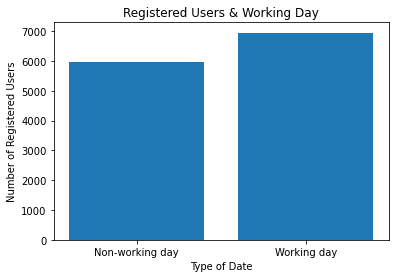

In [41]:
plt.bar(bike_sharing['workingday_str'],bike_sharing['registered'])
plt.title('Registered Users & Working Day')
plt.xlabel('Type of Date')
plt.ylabel('Number of Registered Users')
plt.show()

Above bar charts show that causual users tend to rent bike on non-working days, whereas registered users tend to bike on working days. Let's further explore above hypothesis by averaging the number of rentals.

In [42]:
bike_sharing.groupby('workingday_str')[['casual','registered']].mean()

,casual,registered
workingday_str,,
Non-working day,1371.134199,2959.034632
Working day,606.570000,3978.250000


After averaging the number of rentals, above hypothesis seems valid, the average number shows casual users tend to bike on non-working days, nearly double of working day. Registerd users bike more on working days. This can be useful business insight for marketing / sales teams to understand user behaviour and come up more plans in the future. Let's explore the distribution of number of bike rentals per day.

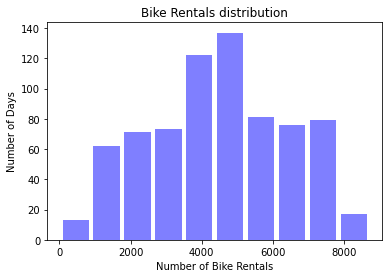

In [44]:
plt.hist(bike_sharing['cnt'],facecolor='blue',alpha=0.5, rwidth=0.85)
plt.title('Bike Rentals distribution')
plt.xlabel('Number of Bike Rentals')
plt.ylabel('Number of Days')
plt.show()

Above chart which seems normally distributed, it shows that most of the number of bike rentals range 4500-5000 per day and around 130 days account for 4500-5000 range within 2 years. If the chart shows right-skewed, that may reflect a caustion that the business is declining. If the chart shows left-skewed, that may reflect a good sign that rentals are increasing.